In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [23]:
def load_data(dataset):

    # read the data set 
    df = pd.read_csv(dataset)

    # drop some columns 
    df = df.drop(['Happiness Rank', 'Standard Error', 'Family', 'Dystopia Residual'], axis = 1)

    # rename some columns 
    df.rename(columns={'Economy (GDP per Capita)': 'GDP per capita', 
                     'Health (Life Expectancy)': 'Life expectancy',
                     'Trust (Government Corruption)': 'Trust'}, inplace=True)

    return(df)

In [40]:
g_15 = load_data('2015.csv')
g_16 = pd.read_csv('2016.csv')
g_17 = pd.read_csv('2017.csv')
g_18 = pd.read_csv('2018.csv')
g_19 = pd.read_csv('2019.csv')

In [41]:
# create column:
def choose_country(df, country): 
    df["Choice"] = df['Country'].apply(lambda x: country if x == country else "Other")
    return(df)

In [42]:
g_15 = choose_country(g_15, "Iceland")
g_15

,Country,Region,Happiness Score,GDP per capita,Life expectancy,Freedom,Trust,Generosity,Choice
0,Switzerland,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,Other
1,Iceland,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,Iceland
2,Denmark,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,Other
3,Norway,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,Other
4,Canada,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,Other
...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,0.22628,Other
154,Benin,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,0.18260,Other
155,Syria,Middle East and Northern Africa,3.006,0.66320,0.72193,0.15684,0.18906,0.47179,Other
156,Burundi,Sub-Saharan Africa,2.905,0.01530,0.22396,0.11850,0.10062,0.19727,Other


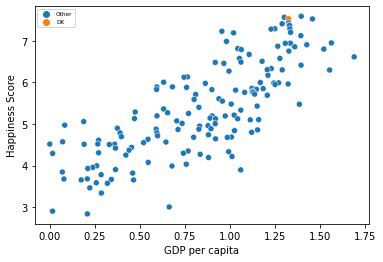

In [33]:
g_15
sns.scatterplot(x = 'GDP per capita',
               y = 'Happiness Score',
               hue = 'choice',
               data = g_15)
plt.legend(loc = 'upper left',
          fontsize = 'xx-small')

In [17]:
# merge stuff?
data_frames = [g_15, g_16, g_17, g_18, g_19]
g_18.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [47]:
g_15 = g_15.sort_values(by = "Country", axis = 0, ascending = True)
g_15

,Country,Region,Happiness Score,GDP per capita,Life expectancy,Freedom,Trust,Generosity,Choice
152,Afghanistan,Southern Asia,3.575,0.31982,0.30335,0.23414,0.09719,0.36510,Other
94,Albania,Central and Eastern Europe,4.959,0.87867,0.81325,0.35733,0.06413,0.14272,Other
67,Algeria,Middle East and Northern Africa,5.605,0.93929,0.61766,0.28579,0.17383,0.07822,Other
136,Angola,Sub-Saharan Africa,4.033,0.75778,0.16683,0.10384,0.07122,0.12344,Other
29,Argentina,Latin America and Caribbean,6.574,1.05351,0.78723,0.44974,0.08484,0.11451,Other
...,...,...,...,...,...,...,...,...,...
22,Venezuela,Latin America and Caribbean,6.810,1.04424,0.72052,0.42908,0.11069,0.05841,Other
74,Vietnam,Southeastern Asia,5.360,0.63216,0.74676,0.59444,0.10441,0.16860,Other
135,Yemen,Middle East and Northern Africa,4.077,0.54649,0.40064,0.35571,0.07854,0.09131,Other
84,Zambia,Sub-Saharan Africa,5.129,0.47038,0.29924,0.48827,0.12468,0.19591,Other


In [56]:
test = np.array(g_15['Country'])

In [61]:
nonetype = np.array(['None'])
a = np.append(nonetype, test)

In [ ]:
g_15
sns.scatterplot(x = 'GDP per capita',
               y = 'Happiness Score',
               hue = 'choice',
               data = g_15)
plt.legend(loc = 'upper left',
          fontsize = 'xx-small')

In [12]:
#data_frames
from functools import reduce
df_merged = reduce(lambda  left, right: pd.merge(left, 
                                                 right,
                                                 on=['Country'],
                                                 how='outer'), 
                   data_frames)

KeyError: 'Country'